In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df=pd.read_csv('Obesity_encoded.csv')

In [38]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,2
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,3


In [39]:
#Separação de X e y
X=df.drop(columns=['Obesity','Weight','Height'],axis=1)
y=df['Obesity']

In [40]:
#Separação de dataset em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:

variaveis_numericas=['Age','FCVC','NCP','CH2O','FAF','TUE']


scaler_step=ColumnTransformer(
    transformers=[
        #variaveis numericas
        ('scaler',StandardScaler(),variaveis_numericas)

    ],
    # as outras variaveis já estão codificadas então vamos mantê-las normais.
    remainder='passthrough'
)


In [42]:
#Criando o pipeline


model_pipeline=Pipeline([
        ('scaling',scaler_step),
        ('model',RandomForestClassifier(n_estimators=100,random_state=42))    
        ])

In [43]:
#treina  o modelo e calcula a media so do X_train
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [44]:
#Avaliando o modelo

y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        56
           1       0.67      0.61      0.64        62
           2       0.73      0.71      0.72        56
           3       0.75      0.60      0.67        50
           4       0.81      0.82      0.82        78
           5       0.83      0.95      0.89        58
           6       0.98      1.00      0.99        63

    accuracy                           0.80       423
   macro avg       0.80      0.80      0.80       423
weighted avg       0.80      0.80      0.80       423



In [45]:
cm = confusion_matrix(y_test, y_pred)

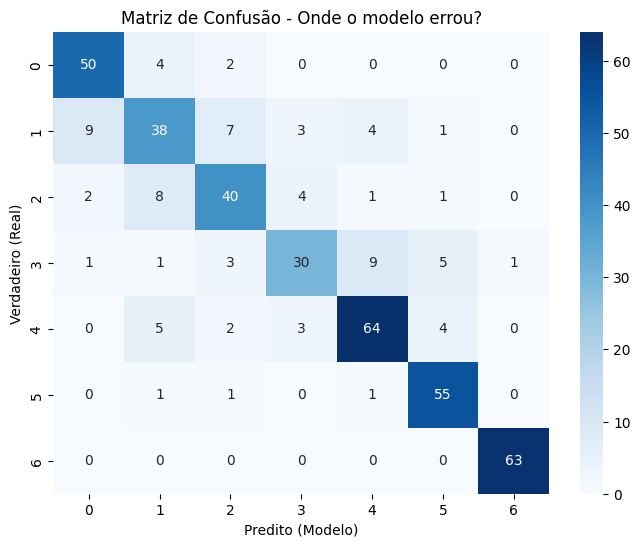

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Verdadeiro (Real)')
plt.xlabel('Predito (Modelo)')
plt.title('Matriz de Confusão - Onde o modelo errou?')
plt.show()

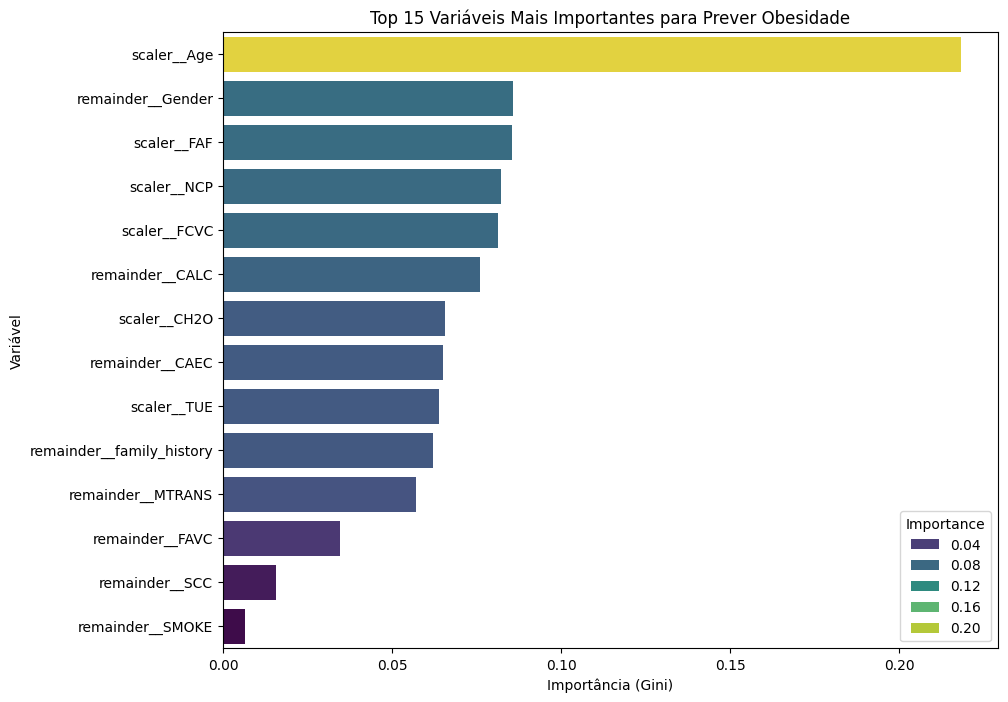

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Acessar os passos internos do Pipeline
# 'model' e 'scaling' são os nomes que demos no passo anterior
step_modelo = model_pipeline.named_steps['model']
step_preprocessor = model_pipeline.named_steps['scaling']

# 2. Pegar a Importância (Números)
importancias = step_modelo.feature_importances_

# 3. Pegar os Nomes das Colunas (Texto)
# O método get_feature_names_out() garante que a ordem bate com a do modelo
nomes_features = step_preprocessor.get_feature_names_out()

# 4. Criar um DataFrame para organizar
df_importance = pd.DataFrame({
    'Feature': nomes_features,
    'Importance': importancias
})

# 5. Ordenar do maior para o menor
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# 6. Plotar
plt.figure(figsize=(10, 8))
sns.barplot(data=df_importance.head(15), x='Importance', y='Feature', palette='viridis',hue='Importance')
plt.title('Top 15 Variáveis Mais Importantes para Prever Obesidade')
plt.xlabel('Importância (Gini)')
plt.ylabel('Variável')
plt.show()